#Grocery store sales analysis

##**1. Data download and overview**

In [1]:
!pip install openpyxl


Let's import libraries...

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


... and download the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path_to_file = '/content/drive/MyDrive/Grocery_store_sales_analysis/data/Grocery Database.xlsx'


Sheets in an Excel file

In [5]:
xl_core = pd.ExcelFile(path_to_file, engine='openpyxl')

# Creating a copy of data from the source file
sheets = {sheet_name: xl_core.parse(sheet_name) for sheet_name in xl_core.sheet_names}

# Saving data to a new file (temporary file or in memory)
with pd.ExcelWriter('temporary_copy.xlsx', engine='openpyxl') as writer:
    for sheet_name, df in sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# Reading a new file as a copy
xl = pd.ExcelFile('temporary_copy.xlsx', engine='openpyxl')

print("Sheets in an Excel file:", xl.sheet_names)


Sheets in an Excel file: ['Grosto DB', 'Sheet2', 'Fact Summary']


Reading a specific sheet

In [6]:
df = xl.parse('Grosto DB')
print(df.head())


  Receipt Number       Date  Year  Month             Time  Mobile Number  \
0       GIJ00001 2016-01-02  2016      1  10:08:03.260000     9793548581   
1       GIJ00002 2016-01-02  2016      1  15:46:50.832000     9938441276   
2       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   
3       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   
4       GIJ00003 2016-01-02  2016      1  11:28:52.166000     9976742552   

  Membership ID  Loyalty Card Points  Age  Gender  ...  GST Gross Bill Amount  \
0     MIDID0001                    1   36    Male  ...  0.1          13.32408   
1     MIDID0002                    2   54    Male  ...  0.1          25.26480   
2     MIDID0003                    1   16  Female  ...  0.1          42.18786   
3     MIDID0003                    1   16  Female  ...  0.1          42.18786   
4     MIDID0003                    2   16  Female  ...  0.1          42.18786   

  Payment Mode                 Bank Name % Profit Margin

This dataset is a record of grocery store purchases, including details about each receipt, including date, time, receipt number, customer mobile number, ID, and various financial metrics such as profit percentage, operating expenses, and product cost.

The data contains useful information for analyzing purchasing behavior, effectiveness of loyalty programs, customer demographics and store financial performance.

Dataset size

In [7]:
print(f"Dataset size: {df.shape}")


Dataset size: (50447, 32)


Overview of data types

In [8]:
print(df.dtypes)


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Checking for missing values

In [9]:
print(df.isnull().sum())


Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64


Therefore, there are no missing values

##**2. Data pre-processing**

*   Let's translate data types into more appropriate formats

In [10]:
print("Column names:", df.columns)


Column names: Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')


In [11]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [12]:
# We convert the 'Date' column into the date format
df['Date'] = pd.to_datetime(df['Date'])

# Let's convert some columns into the appropriate types
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['QTY'] = df['QTY'].astype(int)

# Overview of updated data types
print(df.dtypes)


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Now, we can move on to more detailed data analysis

##**3. Business questions and data analysis**

###1: What is the number of unique checks in this data set?

In [13]:
unique_receipts = df['Receipt Number'].nunique()
print(f"Number of unique checks: {unique_receipts}")


Number of unique checks: 13048


**Conclusion**

The number of unique checks in this data set is 13048. This indicates a large number of individual transactions that were recorded during the data collection period. By analyzing these transactions, we can gain valuable information about customer purchasing behavior, popular products and brands, and the effectiveness of loyalty programs and marketing campaigns. This enables us to develop strategies to improve customer service and increase sales.

###2: What is the average cost of one check?

In [14]:
average_bill = df['Gross Bill Amount'].mean()
print(f"Average cost of one check: {average_bill}")


Average cost of one check: 72.3789157446429


**Conclusion**

The average cost of one check is 72.38. This gives us an idea of ​​the average customer spend per store visit. A high average check value can indicate effective sales strategies, promotions, or loyalty programs that encourage customers to make larger purchases. On the contrary, if this value is considered low, it can be a signal to develop new marketing campaigns, loyalty programs or improve service quality to stimulate increased customer spending.

###3: What is the most popular payment method?

In [15]:
most_popular_payment_mode = df['Payment Mode'].mode()[0]
print(f"The most popular payment method: {most_popular_payment_mode}")


The most popular payment method: Card


**Conclusion**

The most popular payment method among customers is payment by card.

Business offers:

1. **Infrastructure improvement for card payment**: Ensure the availability of a sufficient number of terminals for contactless and card payments to avoid queues and inconvenience for customers.

2. **Implementation of loyalty programs**: Offer bonuses or discounts to customers who frequently use card payments to encourage repeat purchases.

3. **Cooperation with banks**: Consider working with banks to provide special offers or discounts for certain cardholders.

4. **Marketing**: Use data on the popularity of card payments in marketing campaigns, offering exclusive promotions to customers who choose this payment method.

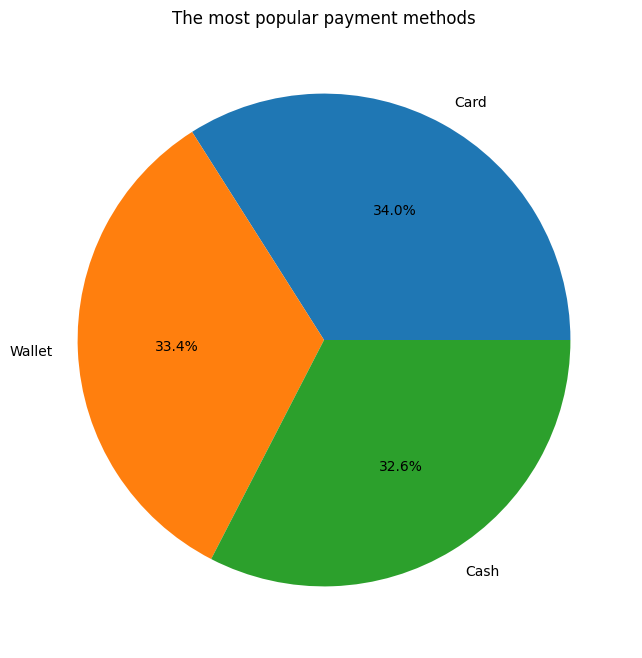

In [16]:
# Pie chart of the most popular payment methods
plt.figure(figsize=(8, 8))
df['Payment Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('The most popular payment methods')
plt.ylabel('')
plt.show()


According to the diagram, all 3 payment methods are almost equal parts, so their support should be paid attention to.

###4: What is the number of purchases by category?

In [17]:
category_counts = df['Category'].value_counts()
print(category_counts)


Category
Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Meat & Seafood               2149
Mother & Baby                2064
Household                    1881
Party Supplies               1836
Wines, Beers & Spirits       1714
Health                       1008
Name: count, dtype: int64


**Conclusion**

Categories with the most purchases include "Bakery & Breakfast" (6,770 purchases), "Frozen" (6,393 purchases) and "Beauty" (5,205 purchases). The least popular categories are "Health" (1,008 purchases) and "Wines, Beers & Spirits" (1,714 purchases).

Business offers:

1. **Maintenance of popular categories**: Ensure the availability of a wide range of products in the most popular categories ("Bakery & Breakfast", "Frozen", "Beauty") and expand their offer to meet demand.

2. **Promotions for less popular categories**: Implement marketing campaigns and discounts for less popular categories ("Health", "Wines, Beers & Spirits") to increase their sales.

3. **Analysis of buying trends**: Investigate the reasons for the popularity of certain categories and apply this knowledge to optimize the assortment in other categories.

4. **Cross-selling**: Implement cross-selling strategies by offering discounts or special offers to customers who purchase products from less popular categories alongside popular products.

5. **Inventory and Logistics**: Optimize inventory management for popular categories to avoid product shortages and ensure they are always on the shelves.

The graph of the distribution of the number of purchases by category

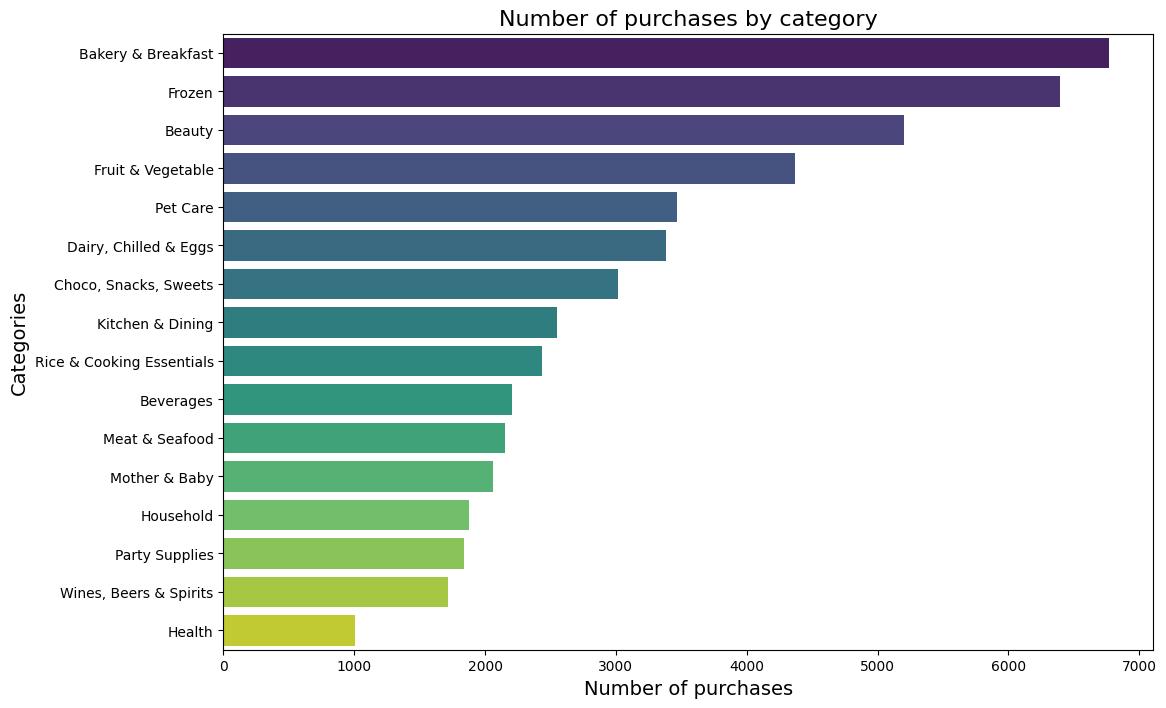

In [18]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Setting the graph size
plt.figure(figsize=(12, 8))

# Construction of the schedule
sns.barplot(x='Count', y='Category', data=category_counts, palette='viridis', hue='Category', dodge=False, legend=False)

# Adding a title and axis labels
plt.title('Number of purchases by category', fontsize=16)
plt.xlabel('Number of purchases', fontsize=14)
plt.ylabel('Categories', fontsize=14)

# Graph display
plt.show()


###5: What is the number of purchases by city?

In [19]:
city_counts = df['City'].value_counts()
print(city_counts)


City
Manila          12380
Bedok           12272
Kuala Lumpur    10763
Jakarta          9108
Woodlands        5924
Name: count, dtype: int64


**Conclusion**

The largest number of purchases was recorded in the following cities:
- Manila: 12,380 purchases
- Bedok: 12272 purchases
- Kuala Lumpur: 10,763 purchases
- Jakarta: 9108 purchases
- Woodlands: 5,924 purchases

Business offers:

1. **Focusing resources on top markets**: Concentrate marketing efforts and resources in the cities with the highest number of purchases (Manila, Bedok, Kuala Lumpur) to maximize revenue.

2. **Expansion of presence**: Consider opening new stores or increasing warehouses in high-traffic cities for better customer service.

3. **Targeted advertising campaigns**: Run advertising campaigns targeting residents of the cities with the highest sales using local media and online platforms.

4. **Analysis of less active markets**: Examine the reasons for fewer purchases in other cities and develop strategies to increase sales there, for example through local promotions or improved assortment.

5. **Personalization of services**: Use purchase data to create personalized offers for customers in different cities, taking into account local preferences and needs.

Let's conduct a statistical A/B test based on the average cost of purchases between two cities (Manila and Bedok)

In [20]:
# Data filtering for two cities
manila_purchases = df[df['City'] == 'Manila']['Gross Bill Amount']
bedok_purchases = df[df['City'] == 'Bedok']['Gross Bill Amount']

# Conducting a t-test to compare mean values
t_stat, p_value = stats.ttest_ind(manila_purchases, bedok_purchases)

print(f"T-статистика: {t_stat}")
print(f"P-значення: {p_value}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the average cost of shopping in Manila and Bedok.")
else:
    print("There is no statistically significant difference between the average cost of shopping in Manila and Bedok.")


T-статистика: 3.0891702726841612
P-значення: 0.0020093960693858895
There is a statistically significant difference between the average cost of shopping in Manila and Bedok.


Since the p-value (0.0020) is less than the significance level (0.05), we can conclude that there is a statistically significant difference between the average cost of shopping in Manila and Bedok. This means that the average values ​​of the cost of purchases in these cities differ significantly, which is confirmed by the low p-value.

Business offers:


1. **Purchase Analysis:** Conduct a more detailed analysis of purchases in Manila and Bedok to determine the reasons for the differences in the average cost of purchases.
2. **Marketing strategies:** Develop and implement different marketing strategies for each city, taking into account the identified differences.
For example, strengthen marketing campaigns in Manila, where the average purchase value is higher, to maintain and increase this figure.
3. **Pricing:** Review the pricing policy at Bedok to understand if there is an opportunity to increase the average cost of purchases without losing customers.

4. **Product assortment:** Pay attention to which products and product categories are most popular in each city, and adapt the assortment according to local needs and preferences.

5. **Customer Loyalty:** Develop loyalty programs and special offers for customers in both cities, taking into account the differences in their buying habits.

###6: What is the average age of buyers?

In [21]:
average_age = df['Age'].mean()
print(f"Average age of buyers: {average_age}")


Average age of buyers: 35.80177215691716


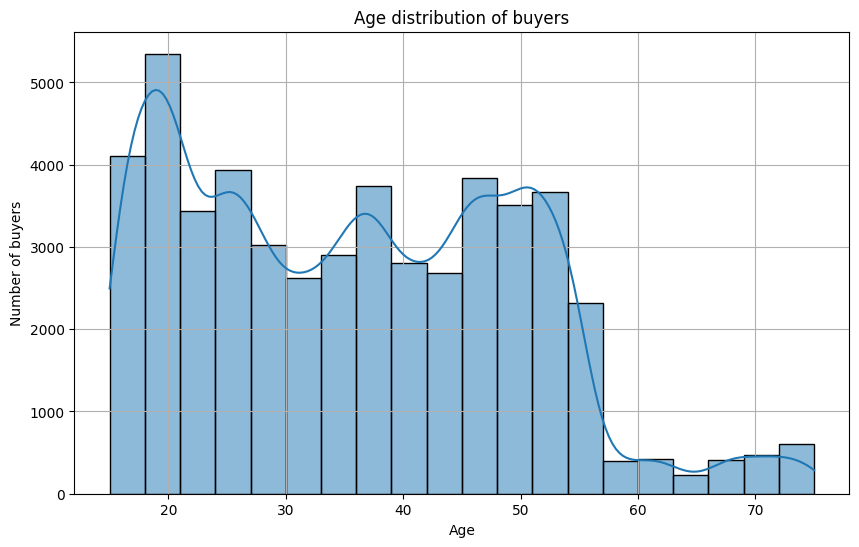

In [22]:
# Histogram of the age distribution of buyers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age distribution of buyers')
plt.xlabel('Age')
plt.ylabel('Number of buyers')
plt.grid()
plt.show()


**Conclusion**

The histogram of the age distribution of buyers shows that the largest number of buyers is around 20 years old. The breakdown also shows a significant number of buyers between the ages of 30 and 50. The average age of buyers is approximately 36 years.

Business offers:

1. **Marketing Strategies for Young Buyers**: Since the largest number of buyers are around the age of 20, special marketing campaigns aimed at the youth should be developed. These can be promotions, discounts or special offers for students and young professionals.

2. **Expansion of product range for different age groups**: Considering the significant number of buyers in the age group of 30-50 years, a wide range of products should be provided to meet the needs of this category. These can be products for the home, healthy food, family products and others.

3. **Loyalty and reward programs**: Develop loyalty programs aimed at different age groups, particularly young people and middle-aged people. These can be accumulation points, exclusive offers and other benefits.

4. **Digital Marketing and Social Media**: Actively use digital channels to interact with buyers of different age groups. Social networks, mobile applications and e-mails can be effective in attracting both young and middle-aged buyers.

5. **Partnerships with brands and companies**: Collaborate with brands and companies that target these age groups for joint marketing promotions and special offers that can appeal to shoppers of all ages.

###7: What is the average check for men and women?

In [23]:
average_bill_by_gender = df.groupby('Gender')['Gross Bill Amount'].mean()
print(average_bill_by_gender)


Gender
Female    72.807654
Male      70.299996
Name: Gross Bill Amount, dtype: float64


Medium check scatter plot for men and women

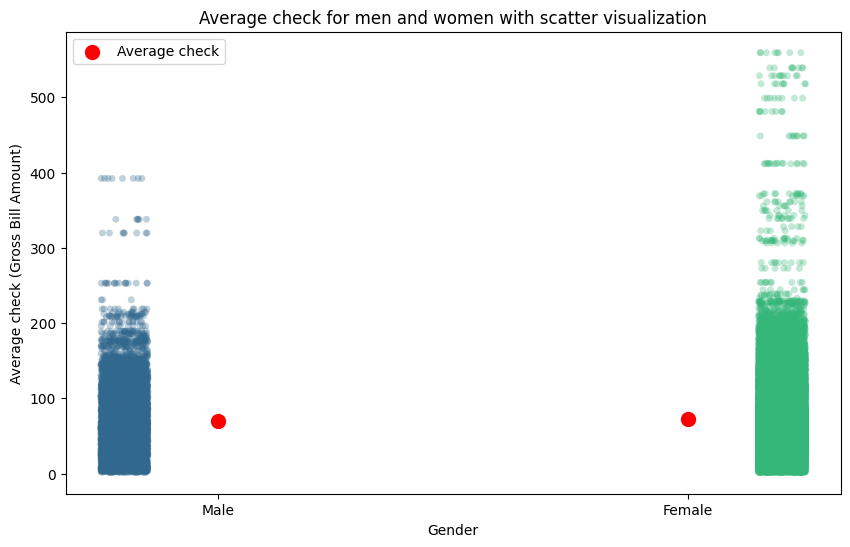

In [24]:
plt.figure(figsize=(10, 6))

# Adding scatter points for each transaction
sns.stripplot(x='Gender', y='Gross Bill Amount', data=df, jitter=True, alpha=0.3, hue='Gender', dodge=True, palette='viridis', legend=False)

# Adding average values ​​as large dots
plt.scatter(['Female', 'Male'], average_bill_by_gender, color='red', s=100, label='Average check')

# Adding axis title and captions
plt.title('Average check for men and women with scatter visualization')
plt.xlabel('Gender')
plt.ylabel('Average check (Gross Bill Amount)')
plt.legend()

plt.show()


**Conclusion**

Based on the results of the analysis of the average check, it consists of:
- For women: 72.81 currency units.
- For men: 70.30 currency units.

The average check for women is slightly higher than for men, but the difference is small.

Business offers:
1. **Marketing Strategies**: Targeted marketing campaigns can attract more female audiences, especially if they have a higher average paycheck.

2. **Personalized offers**: Developing personalized offers for each customer group can drive an increase in the average check in both categories of customers.

3. **Analysis of the product offer**: Estimating the popularity of products among each group of customers will help increase profitability by adapting the assortment to the specifics of the request.

These steps can help optimize business profitability while increasing your average checking account.

A t-test for independent samples (`ttest_ind`) from the `scipy.stats` library was also performed to compare the average values ​​of account amounts between men and women:

- **Test Statistics:** T-value is -4.32.
- **P-value:** 1.56e-05 (very small).

In [25]:
male_bills = df[df['Gender'] == 'Male']['Gross Bill Amount']
female_bills = df[df['Gender'] == 'Female']['Gross Bill Amount']

# Hypothesis testing
t_stat, p_value = ttest_ind(male_bills, female_bills)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in average check size between men and women is statistically significant.")
else:
    print("The difference in average check size between men and women is not statistically significant.")


T-statistic: -4.319996690271764, P-value: 1.5632939825487073e-05
The difference in average check size between men and women is statistically significant.


**Conclusion**

Since the p-value is significantly less than the 0.05 significance level, we reject the null hypothesis that the average bill amounts do not differ between men and women. This indicates that the difference in average check size between men and women is statistically significant.

Business offers:

1. **Adaptation of marketing campaigns:**
 - You should focus on women who have a slightly higher average check. Develop special promotions or loyalty programs aimed at women.

2. **Personalized offers:**
 - Consider the possibility of introducing personalized offers or discounts for different groups of customers, which can increase the average check.

3. **Product Research:**
 - Conduct additional research to find out which products or services have the highest demand among women and men, and optimize the assortment accordingly.

4. **Expansion of research:**
 - We will also conduct additional tests to examine other factors that may affect the average check, such as age, location or type of purchase.

###8: What is the number of purchases by year?

In [26]:
yearly_purchases = df['Year'].value_counts()
print(yearly_purchases)


Year
2019    15346
2018    13231
2017    11644
2016    10226
Name: count, dtype: int64


Linear graph of the number of purchases by year

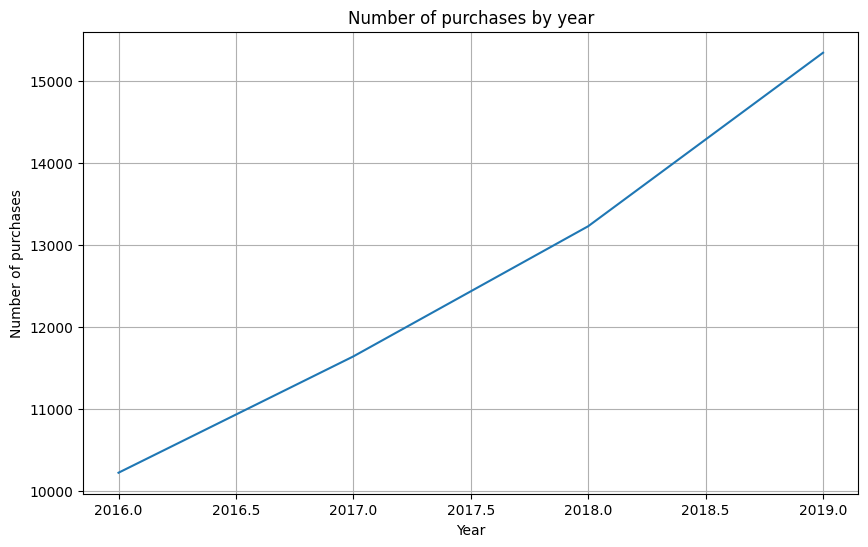

In [27]:
plt.figure(figsize=(10, 6))
yearly_purchases.sort_index().plot(kind='line')
plt.title('Number of purchases by year')
plt.xlabel('Year')
plt.ylabel('Number of purchases')
plt.grid()
plt.show()


**Conclusion**

Over the past four years, there has been a positive trend in the growth of the number of purchases:

- **2019:** 15,346 purchases
- **2018:** 13,231 purchases
- **2017:** 11,644 purchases
- **2016:** 10,226 purchases

This indicates a trend towards increasing customer activity.

Business offers:

1. **Infrastructure development:**
2. **Optimization of logistics:**
3. **Marketing and promotion:**
4. **Increasing the assortment:**

These steps will allow you to optimize the company's activities and maximize profitability in the face of growing demand for products or services.

###9: What is the average purchase quantity (QTY) for each category?

In [28]:
average_qty_by_category = df.groupby('Category')['QTY'].mean().sort_values(ascending=False)
print(average_qty_by_category)



Category
Meat & Seafood               1.567706
Dairy, Chilled & Eggs        1.565217
Fruit & Vegetable            1.559497
Household                    1.559277
Bakery & Breakfast           1.554801
Beauty                       1.554083
Frozen                       1.549664
Wines, Beers & Spirits       1.549592
Rice & Cooking Essentials    1.548931
Kitchen & Dining             1.547806
Choco, Snacks, Sweets        1.541239
Party Supplies               1.538126
Mother & Baby                1.528101
Health                       1.524802
Pet Care                     1.521501
Beverages                    1.520380
Name: QTY, dtype: float64


**Conclusion**

The average purchase volume (QTY) for each product category varies slightly, but there are still differences:

- **Highest purchase volume**: Meat & Seafood (almost 1.57 units) and Dairy, Chilled & Eggs (1.57 units).
- **Lowest purchase volume**: Beverages (1.52 units) and Pet Care (1.52 units).

This indicates that each category has its own unique features of consumption.

Business offers:

1. **Optimization of the assortment**: Consider the possibility of expanding the assortment in categories with a higher average volume of purchases to meet demand.

2. **Cross-selling and increasing the average receipt**: Strategies should be developed to stimulate cross-selling and increase the average volume of purchases per customer.

3. **Marketing promotions**: Focus marketing campaigns on categories with lower average purchase volume to increase their appeal among customers.

4. **Analysis and forecasting**: We will use analytical data to predict changes in consumer habits and adapt business strategies according to these changes.

Bar chart of average purchase volume (QTY) for each category:

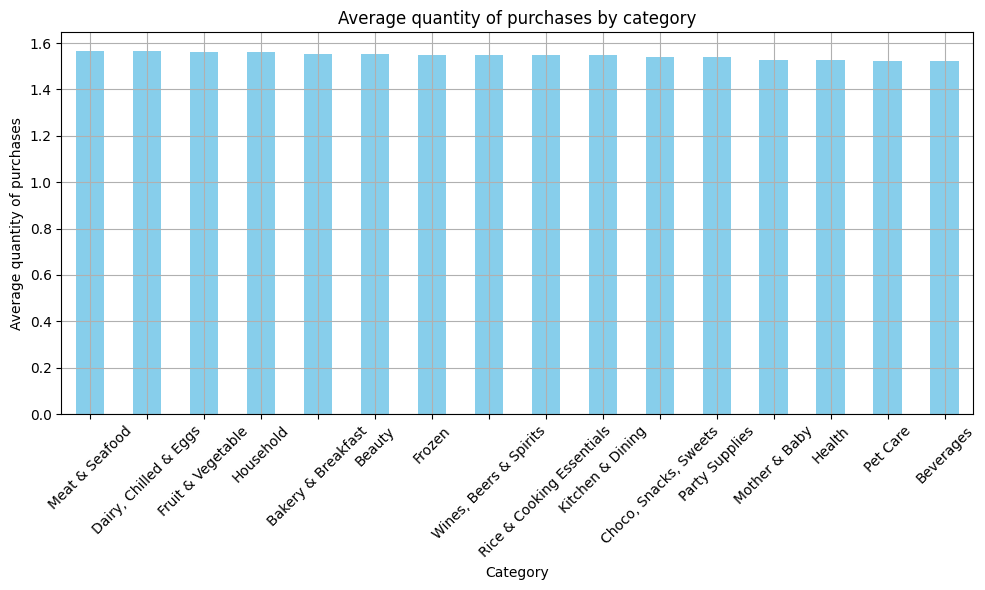

In [29]:
average_qty_by_category =  df.groupby('Category')['QTY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_qty_by_category.plot(kind='bar', color='skyblue')
plt.title('Average quantity of purchases by category')
plt.xlabel('Category')
plt.ylabel('Average quantity of purchases')

plt.xticks(rotation=45)

plt.tight_layout()
plt.grid()

plt.show()

###10: Which brands have the most sales?

In [30]:
top_brands = df['Brand'].value_counts().head(10)
print(top_brands)


Brand
Biogreen         1163
BonJour          1070
RedMart           891
Sainbury          849
Ashai             813
Liang Teck        805
ThyGrace          792
Nature's Gift     763
Alpo              751
Anchor            730
Name: count, dtype: int64


**Conclusion**

The following companies have the largest number of sales among brands:

1. **Biogreen**: 1163 sales
2. **BonJour**: 1070 sales
3. **RedMart**: 891 sales
4. **Sainsbury**: 849 sales
5. **Ashai**: 813 sales

These brands are distinguished by significant sales volumes, which indicates their popularity among consumers.

Business offers:

1. **Encouraging interaction with popular brands**: You can develop special promotions and discounts for popular brands, which will help increase their recognition and attract new customers.

2. **Expansion of the assortment**: It is worth considering the possibility of expanding the assortment of products of these brands to meet demand and increase sales volumes.

3. **Marketing and Promotion**: Let's invest in marketing campaigns to increase awareness of these brands, which helps to increase their popularity among the target audience.

4. **Analysis and forecasting**: It is useful to use analytical data to forecast and adapt sales strategies depending on changes in demand for certain brands.

###11: Summary table

In [31]:
pivot_table = df.pivot_table(
    values='Gross Bill Amount',
    index='City',
    columns='Category',
    aggfunc='mean'
).style.background_gradient(cmap='YlGnBu')

pivot_table


Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
City,,,,,,,,,,,,,,,,
Bedok,66.998930,80.683962,70.942510,60.917538,60.078777,78.560602,76.196896,88.667625,74.981267,66.971156,81.113717,81.524802,64.836921,55.636323,63.851424,58.756352
Jakarta,70.441759,80.139044,78.715223,61.120449,63.190562,83.525380,81.253688,79.786528,81.309848,76.606685,85.026414,83.860778,65.692601,63.387447,70.422373,59.121840
Kuala Lumpur,69.175556,80.381060,78.751366,61.864176,59.170074,80.042119,70.788841,84.869080,78.999444,71.295001,82.453233,79.248780,55.593733,58.987541,70.328049,60.421136
Manila,70.304013,81.769044,75.281098,63.214170,63.979521,78.724480,73.088410,88.499348,79.480097,70.319745,82.218099,82.240679,63.665490,59.131598,68.887935,60.216601
Woodlands,72.017283,80.354881,78.009958,61.993534,65.721603,79.407390,77.321189,86.255649,77.446842,67.658569,92.237249,88.475742,66.869297,64.346077,72.738580,56.909021


Business offers:

1. **Personalized offers**: Personalized marketing campaigns for each city, taking into account specific spend in the categories with the highest average bill amounts.

2. **Optimization of the assortment**: Analysis of demand and selection of the assortment of goods in categories that are popular in specific cities to increase customer satisfaction and increase sales.

3. **Expansion of presence**: The possibility of expanding the network of stores in cities with high average costs for certain product categories, which will contribute to an increase in sales.

4. **Continuous monitoring and analysis**: Continuous monitoring and analysis of data to timely identify new trends and opportunities to improve business performance.

These steps will help optimize the sales strategy and maximize profitability from each city, taking into account its unique consumption characteristics.

##**4. Visualization of metrics in Tableau**

Some additional metrics are done in Tableau:

https://public.tableau.com/app/profile/olenka.olen/viz/final_dashboard_visualization/Dashboard1?publish=yes


A screenshot of the dashboard and an explanation below:

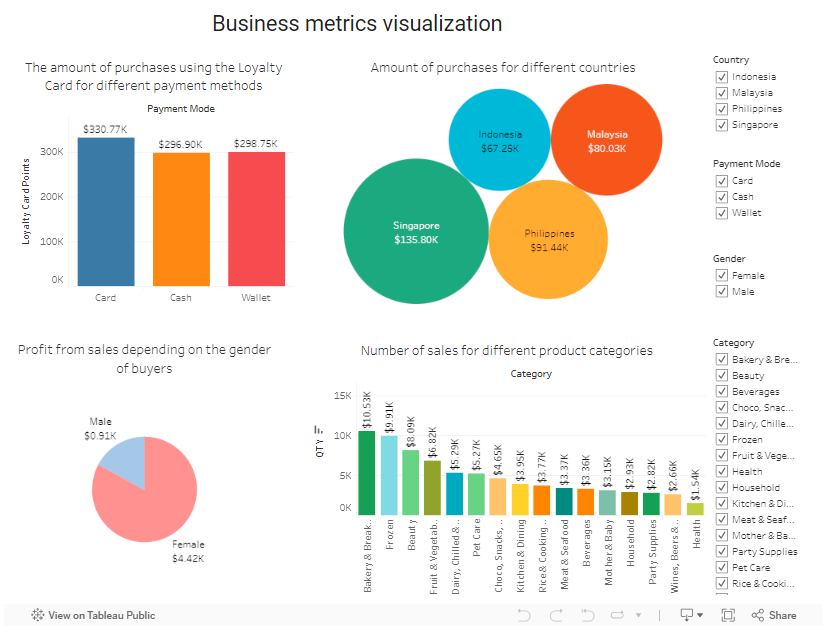

####**1. Amount of purchases using Loyalty Card for different payment methods**

- This graph shows the amount of purchases made using the Loyalty Card, divided by payment methods: Card, Cash, Wallet.

- The highest amount of purchases using Loyalty Card was made using cards (Card), followed by Wallet and Cash.

**Business offers:**
- Promote the use of cards by introducing additional bonuses for card users.
- Develop loyalty programs that would encourage users to use Wallet, as it is almost catching up with cards in popularity.

#### **2. Amount of purchases for different countries**

- The graph represents the amount of purchases, distributed by country: Singapore, Philippines, Malaysia, Indonesia.

- The largest amount of purchases was recorded in Singapore), while the smallest amount was recorded in Indonesia.

**Business offers:**
- Invest more in advertising campaigns in Indonesia to increase sales there.
- Analyze the reasons for successful sales in Singapore and implement these strategies in other countries.

#### **3. Profit from sales depending on the gender of buyers**

- This graph shows the distribution of sales revenue between men and women.

- Women bring much more profit than men.

**Business offers:**
- Develop marketing strategies aimed at women, taking into account their significant contribution to the bottom line.
- Create special offers for men to attract more purchases from their side.

#### **4. Number of sales for different product categories**

- The graph represents the sales quantity (QTY) for different product categories such as Bakery & Breakfast, Frozen, Beauty, etc.

- The Bakery & Breakfast category has the largest number of sales, followed by Frozen and Beauty.

**Business offers:**
- Expand the range of products in the Bakery & Breakfast category, as it is the most popular.
- Analyze the needs and behavior of buyers in categories with fewer sales to increase their appeal.

### That's it :) Thanks for watching!